In [1]:
!pip install kaggle
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hyun0916","key":"da84bae7cd1030e3b89e35a20a1eb5c7"}'}

In [2]:
!ls -1ha kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d qingyi/wm811k-wafer-map

!unzip wm811k-wafer-map.zip

!ls

kaggle.json
Dataset URL: https://www.kaggle.com/datasets/qingyi/wm811k-wafer-map
License(s): CC0-1.0
 97% 145M/149M [00:05<00:00, 29.5MB/s]
100% 149M/149M [00:05<00:00, 26.3MB/s]
Archive:  wm811k-wafer-map.zip
  inflating: LSWMD.pkl               
kaggle.json  LSWMD.pkl	sample_data  wm811k-wafer-map.zip


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 코랩에서는 데이터셋이 특정 경로에 자동으로 위치하지 않으므로, 직접 지정해야 합니다.
# 여기서는 앞서 압축 해제한 데이터셋의 위치를 사용합니다. 예를 들어, 현재 디렉토리(.)에 있다고 가정합니다.
# 데이터셋 경로를 적절히 조정해주세요.

dataset_path = "."  # 현재 디렉토리를 데이터셋 경로로 사용합니다.

import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os
import warnings
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 경로 수정: '../input' 대신 실제 데이터셋이 위치한 경로를 사용합니다.
# 예를 들어, 현재 디렉토리(.) 또는 압축 해제한 특정 폴더를 지정할 수 있습니다.
print(os.listdir(dataset_path))  # 현재 디렉토리의 파일 목록 출력

warnings.filterwarnings("ignore")  # 경고 메시지 무시


./wm811k-wafer-map.zip
./LSWMD.pkl
./kaggle.json
./.config/.last_update_check.json
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/config_sentinel
./.config/gce
./.config/.last_survey_prompt.yaml
./.config/default_configs.db
./.config/logs/2024.05.31/13.25.05.396699.log
./.config/logs/2024.05.31/13.18.03.228568.log
./.config/logs/2024.05.31/13.24.54.928883.log
./.config/logs/2024.05.31/13.30.44.485417.log
./.config/logs/2024.05.31/13.30.45.075371.log
./.config/logs/2024.05.31/13.30.33.984823.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/mnist_train_small.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
['.config', 'wm811k-wafer-map.zip', 'LSWMD.pkl', 'kaggle.json', 'sample_data']


In [4]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 파일 불러오기
df = pd.read_pickle("LSWMD.pkl")
print(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB
None


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]


In [5]:
"""
데이터프레임의 "failureType" 및 "trianTestLabel" 열에서 괄호와 그 안의 내용을 추출하는 작업을 수행
e.g.)[Loc] → Loc
"""
f_squeeze = lambda x: str(np.squeeze(x))
df["failureType"] = df["failureType"].map(f_squeeze)
df["trianTestLabel"] = df["trianTestLabel"].map(f_squeeze)
df.head()

# '[]' 레이블을 가진 샘플을 제외한 데이터프레임 생성
df_with_label = df[df['failureType'] != '[]']
df_with_label = df_with_label[df_with_label['failureType'] != 'none']

# 삭제된 레이블의 개수
deleted_label_count = len(df) - len(df_with_label)

# 'none'과 'none'이 아닌 레이블의 개수
none_label_count = df['failureType'].value_counts().get('none', 0)
other_label_count = len(df_with_label)

# 총 레이블의 개수
total_label_count = len(df_with_label)

# 결과 출력
print(f"삭제된 label 수: {deleted_label_count}")
print(f"'none' label 수: {none_label_count}")
print(f"그 외의 label 수: {other_label_count}")
print(f"전체 수 : {total_label_count}")
print("label 종류: ", df_with_label["failureType"].unique())
df_with_label.head(3)

# Loc과 Edge-Loc 레이블 합치기
df_with_label['failureType'] = df_with_label['failureType'].replace({'Edge-Loc': 'Loc'})

# class2idx 매핑 업데이트
class2idx = {
    'Loc': 0,
    'Center': 1,
    'Edge-Ring': 2,
    'Scratch': 3,
    'Random': 4,
    'Near-full': 5,
    'Donut': 6
}
#웨이퍼 defect 종류 구분
idx2class = {v: k for k, v in class2idx.items()}


# 위에서 수정한 class2idx를 json 파일로 저장
class2idx_json_path = "./config_class2idx.json"
with open(class2idx_json_path, "w") as f:
    json.dump(class2idx, f)

# 인코딩된 레이블을 새로운 열로 추가
df_with_label["encoded_labels"] = df_with_label["failureType"].replace(class2idx)

# 데이터프레임을 리셋하고 pickle 파일로 저장
df_with_label.reset_index(inplace=True, drop=True)
df_with_label.to_pickle("LSWMD_25519.pkl")

# 수정된 데이터프레임의 처음 세 개의 행을 출력
df_with_label.head(3)



삭제된 label 수: 785938
'none' label 수: 147431
그 외의 label 수: 25519
전체 수 : 25519
label 종류:  ['Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random' 'Near-full'
 'Donut']


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,encoded_labels
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Loc,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Loc,0


In [6]:
train_data_length = int(0.8*len(df_with_label))  #전체 데이터를 train-test 8:2 split
df_with_label = df_with_label.sample(frac=1, random_state=2) #섞기
df_train, df_test = df_with_label[:train_data_length], df_with_label[train_data_length:]
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

train_data_length = int(0.7*len(df_train))   #train을 train-valid 7:3 split
df_train, df_val = df_train[:train_data_length], df_train[train_data_length:]
print(f"training: {len(df_train)}, val: {len(df_val)}, test: {len(df_test)}, (all: {len(df_with_label)})")

#데이터 저장
df_train.to_pickle("dataset_train.pickle")
df_val.to_pickle("dataset_val.pickle")
df_test.to_pickle("dataset_test.pickle")
print(os.listdir())

training: 14290, val: 6125, test: 5104, (all: 25519)
['.config', 'LSWMD_25519.pkl', 'config_class2idx.json', 'dataset_val.pickle', 'dataset_test.pickle', 'dataset_train.pickle', 'wm811k-wafer-map.zip', 'LSWMD.pkl', 'kaggle.json', 'sample_data']


In [7]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [8]:
import numpy as np
import pandas as pd
import os
import warnings
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tqdm
from efficientnet_pytorch import EfficientNet

torch.cuda.empty_cache()
#★★★★★★★ DATA AUGMENTATION 조정★★★★★★★★★★★★★★★★★
affine_params = {
    'translate': (0.1, 0.1),
    'scale': (0.8, 1.2),
    'shear': 10
}

perspective_params = {
    'distortion_scale': 0.5,
    'p': 0.5
}
#affine/perspective 사실 둘 다 써봤는데 나쁘진 않았음.. 계수 알아서 조정하고 compose에 함수 추가해서 쓰면댐
#사용하고 안하고는 각자 판단에 맡깁니다


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),

    transforms.ToTensor()
])

class WaferDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        waferMap = self.dataframe.iloc[idx]["waferMap"]
        waferMap = np.expand_dims(waferMap, axis=2)
        waferMap = np.repeat(waferMap, 3, axis=2)
        label = self.dataframe.iloc[idx]["encoded_labels"]

        if self.transform:
            waferMap = self.transform(waferMap)

        return waferMap, label


class EfficientNetModel(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetModel, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0')
        num_ftrs = self.model._fc.in_features
        self.model._fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

class DenseNetModel(nn.Module):
    def __init__(self, num_classes):
        super(DenseNetModel, self).__init__()
        self.model = models.densenet121(pretrained=True)
        num_ftrs = self.model.classifier.in_features
        self.model.classifier = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

# ResNet 모델 정의
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.model = models.resnet18(pretrained=True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)



Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 215MB/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 220MB/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 335MB/s]


Loaded pretrained weights for efficientnet-b0


Epoch 1, Train Loss: 0.3058, Train Acc: 89.34%, Val Loss: 0.1386, Val Acc: 94.73%
Epoch 1 Model saved with Validation Accuracy: 94.73%


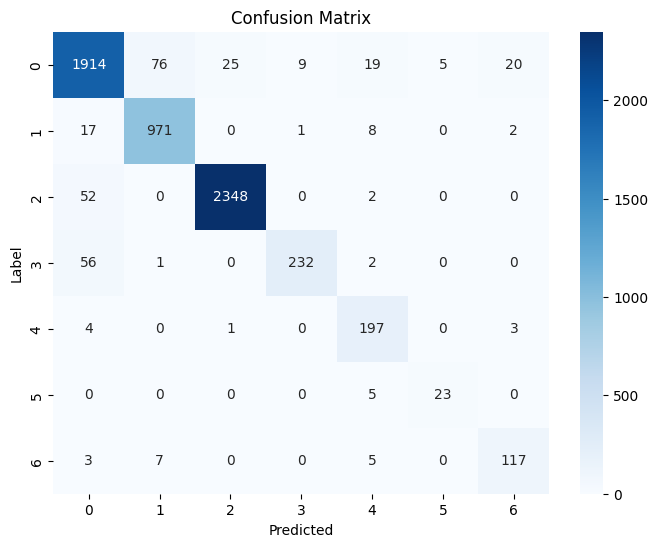

Epoch 2, Train Loss: 0.1427, Train Acc: 94.85%, Val Loss: 0.1215, Val Acc: 95.82%
Epoch 2 Model saved with Validation Accuracy: 95.82%


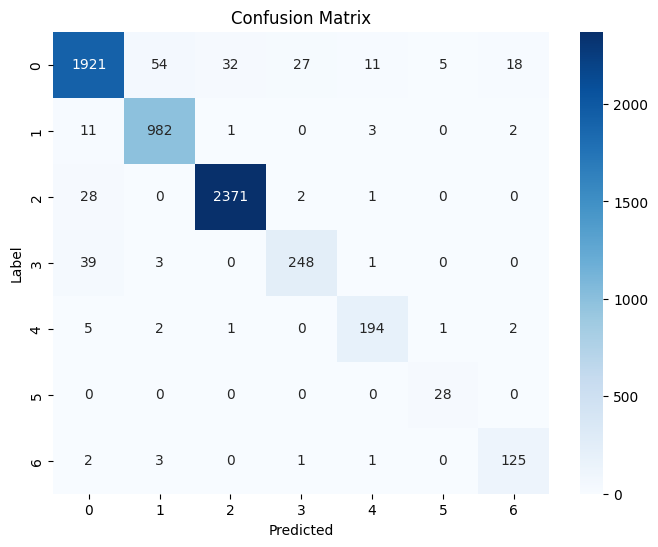

Epoch 3, Train Loss: 0.1005, Train Acc: 96.48%, Val Loss: 0.1220, Val Acc: 95.66%


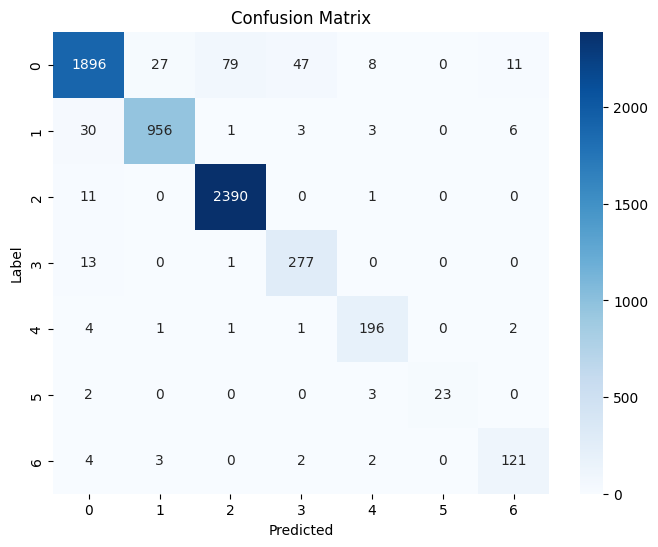

Epoch 4, Train Loss: 0.0697, Train Acc: 97.47%, Val Loss: 0.1266, Val Acc: 95.62%


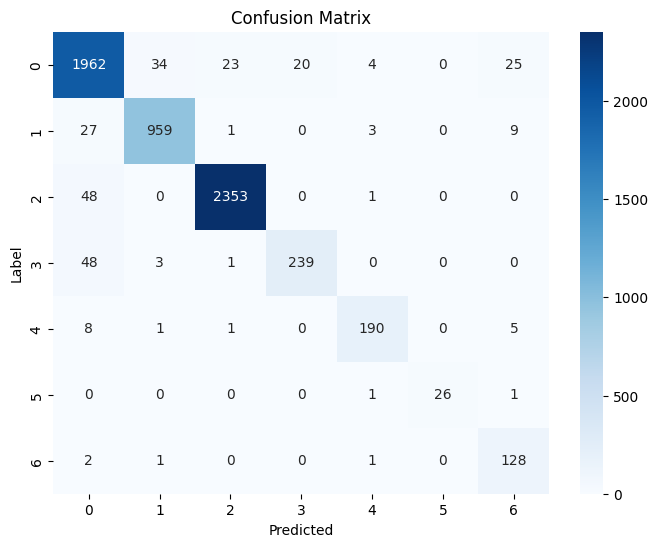

Epoch 5, Train Loss: 0.0613, Train Acc: 97.88%, Val Loss: 0.1306, Val Acc: 95.56%


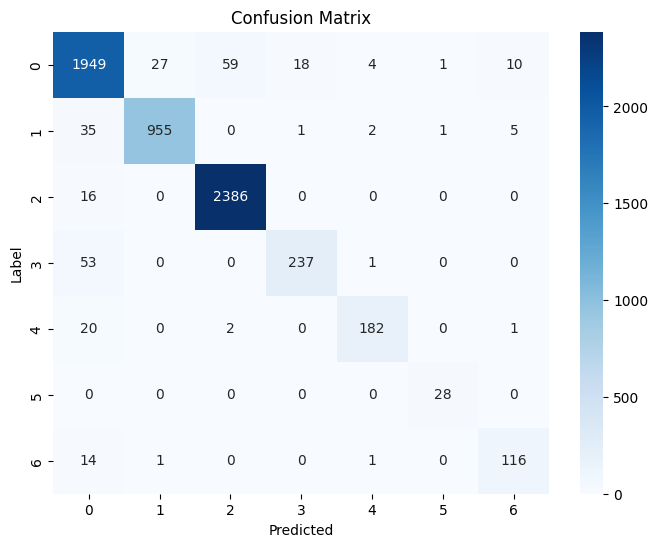

Epoch 6, Train Loss: 0.0511, Train Acc: 98.36%, Val Loss: 0.1309, Val Acc: 95.51%


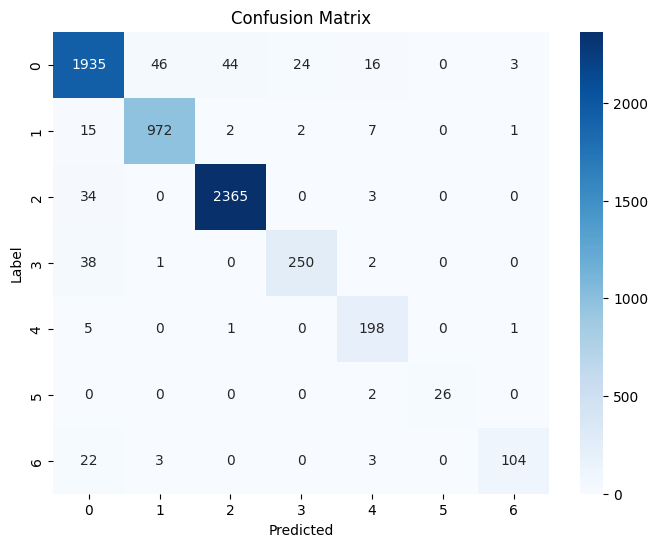

Epoch 7, Train Loss: 0.0377, Train Acc: 98.77%, Val Loss: 0.1299, Val Acc: 95.85%
Epoch 7 Model saved with Validation Accuracy: 95.85%


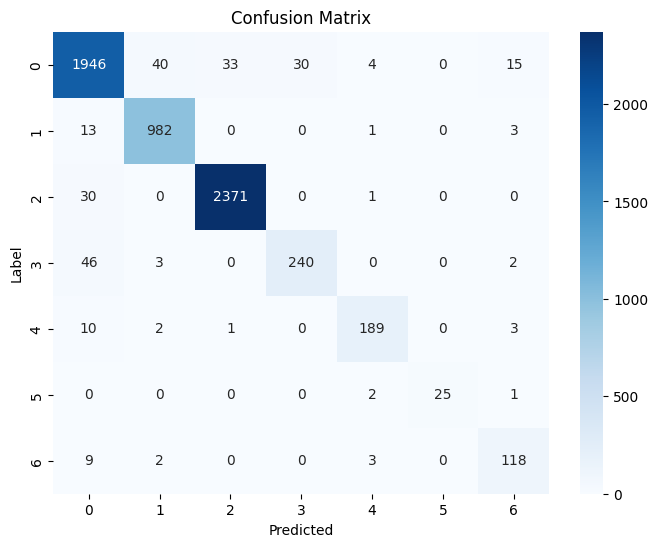

Epoch 8, Train Loss: 0.0348, Train Acc: 98.85%, Val Loss: 0.1416, Val Acc: 95.62%


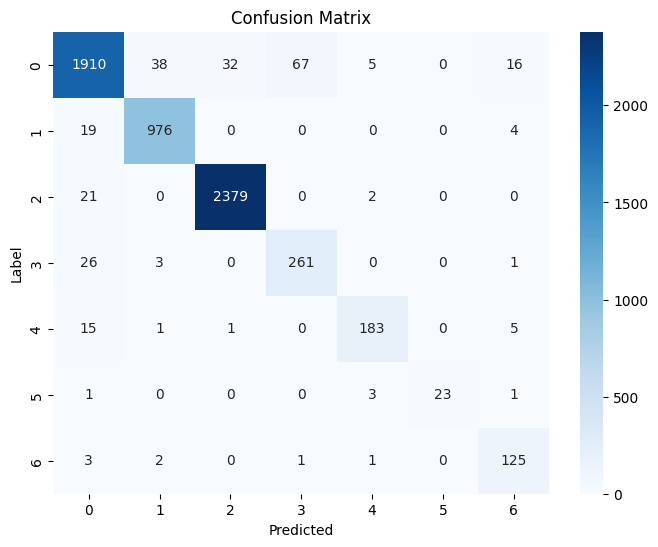

Epoch 9, Train Loss: 0.0303, Train Acc: 98.92%, Val Loss: 0.1465, Val Acc: 95.84%


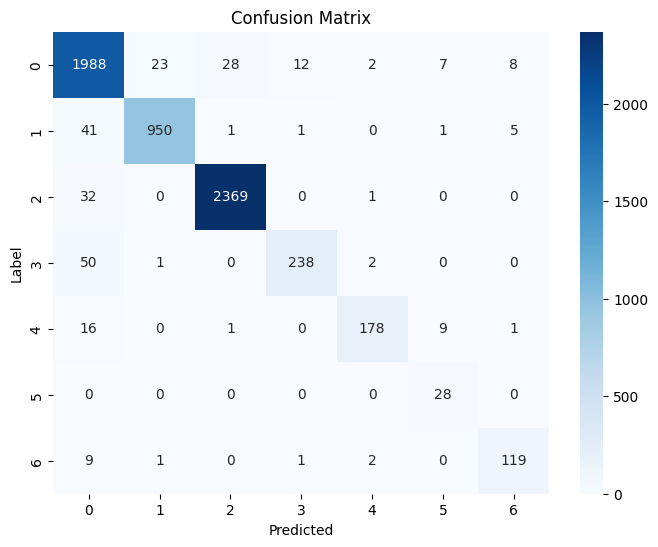

Epoch 10, Train Loss: 0.0273, Train Acc: 99.10%, Val Loss: 0.1374, Val Acc: 95.93%
Epoch 10 Model saved with Validation Accuracy: 95.93%


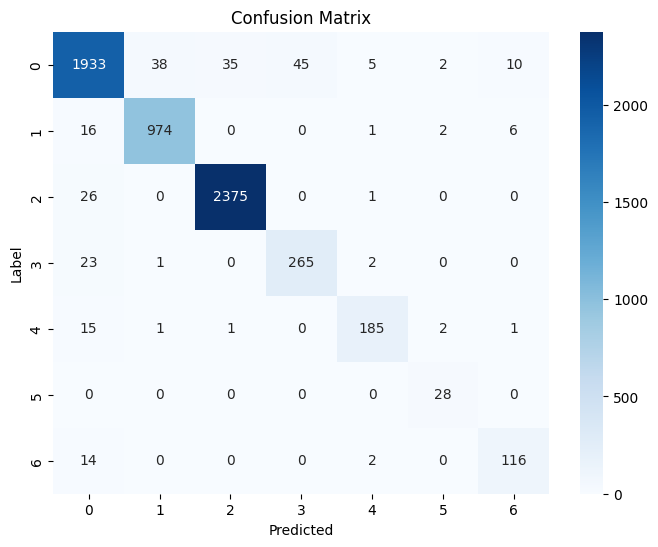

Epoch 11, Train Loss: 0.0239, Train Acc: 99.19%, Val Loss: 0.1532, Val Acc: 95.92%


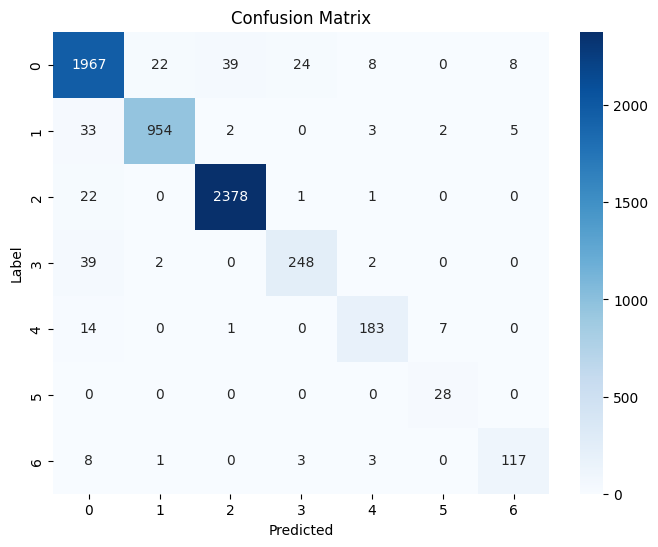

Epoch 12, Train Loss: 0.0270, Train Acc: 99.15%, Val Loss: 0.1403, Val Acc: 96.10%
Epoch 12 Model saved with Validation Accuracy: 96.10%


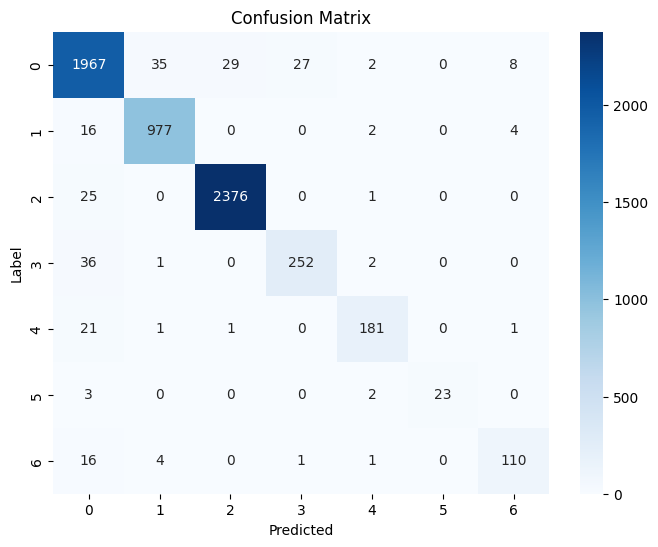

Epoch 13, Train Loss: 0.0241, Train Acc: 99.22%, Val Loss: 0.1515, Val Acc: 95.66%


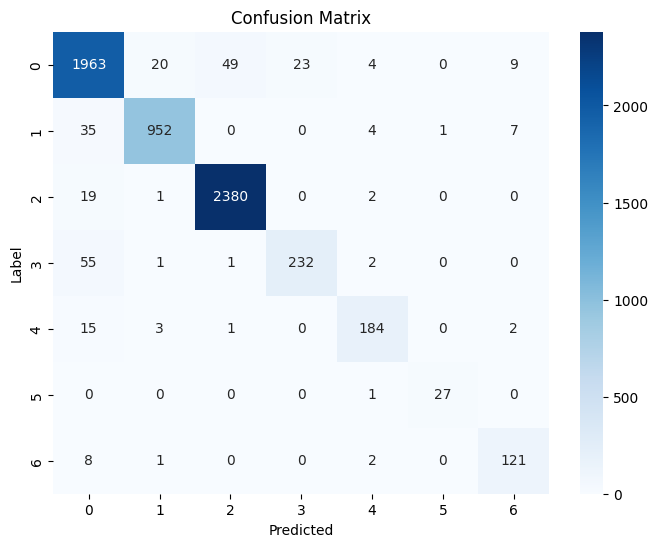

Epoch 14, Train Loss: 0.0202, Train Acc: 99.39%, Val Loss: 0.1943, Val Acc: 95.02%


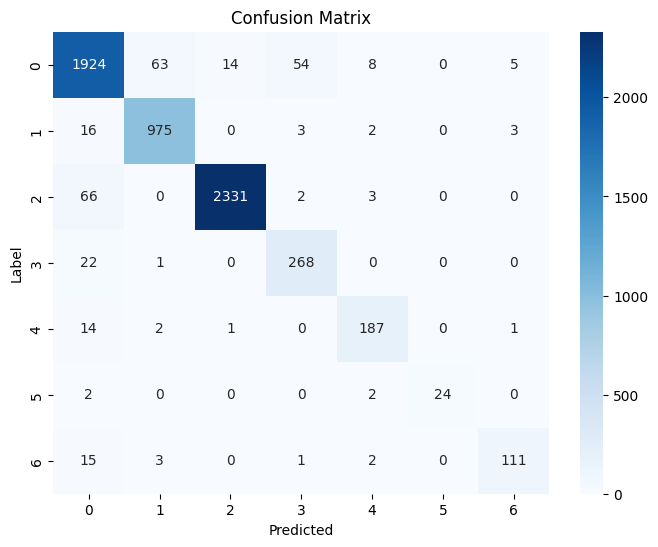

Epoch 15, Train Loss: 0.0234, Train Acc: 99.24%, Val Loss: 0.1867, Val Acc: 95.13%


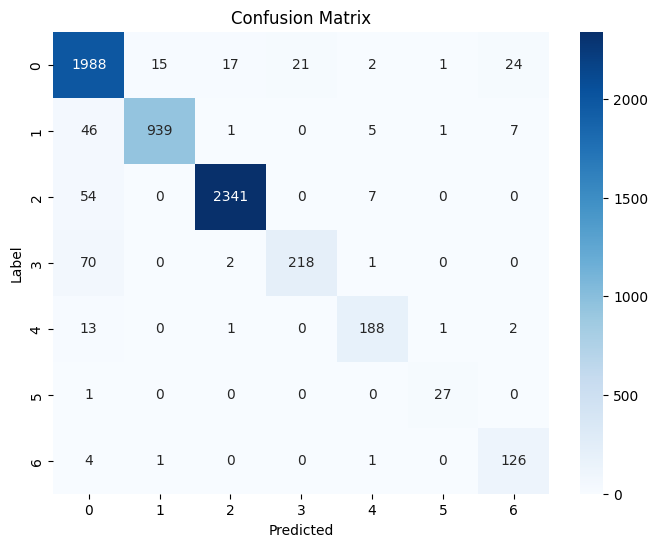

Epoch 16, Train Loss: 0.0274, Train Acc: 99.11%, Val Loss: 0.1548, Val Acc: 95.97%


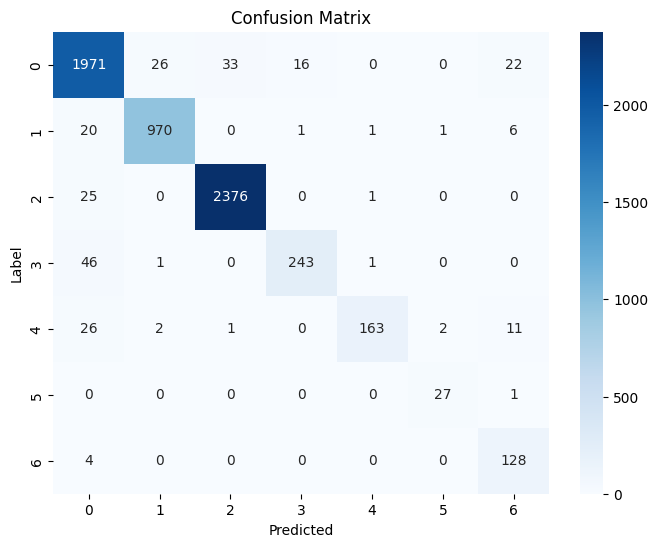

Epoch 17, Train Loss: 0.0215, Train Acc: 99.31%, Val Loss: 0.1328, Val Acc: 96.56%
Epoch 17 Model saved with Validation Accuracy: 96.56%


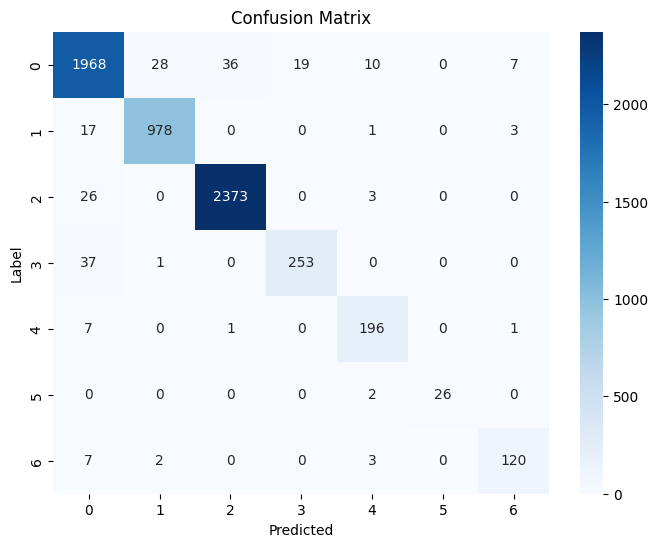

Epoch 18, Train Loss: 0.0235, Train Acc: 99.38%, Val Loss: 0.1455, Val Acc: 95.92%


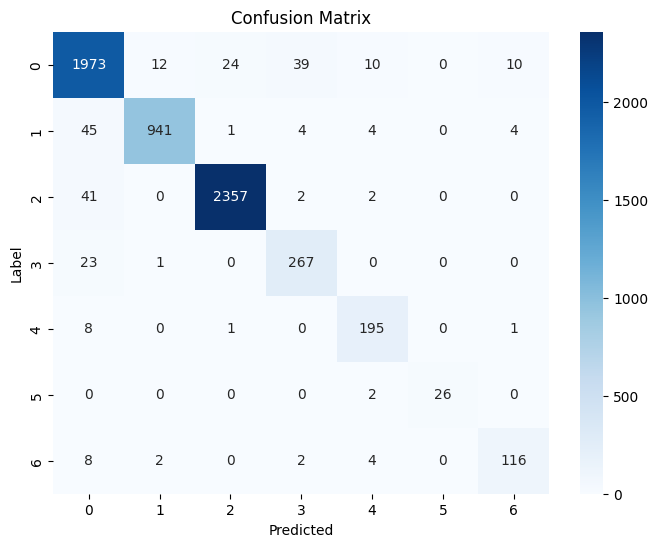

Epoch 19, Train Loss: 0.0126, Train Acc: 99.65%, Val Loss: 0.1558, Val Acc: 96.15%


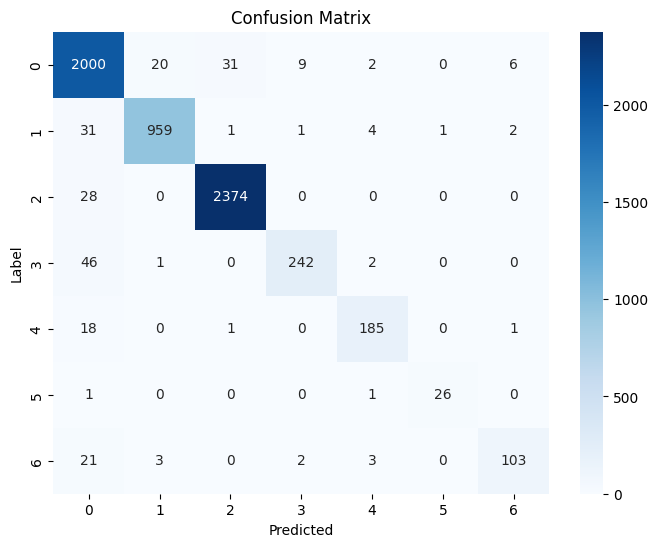

Epoch 20, Train Loss: 0.0143, Train Acc: 99.56%, Val Loss: 0.1557, Val Acc: 95.80%


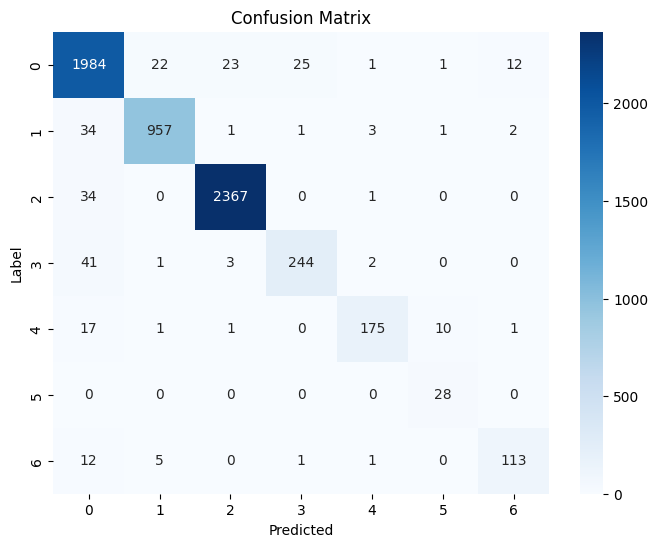

Epoch 1, Train Loss: 0.3048, Train Acc: 89.14%, Val Loss: 0.1397, Val Acc: 94.81%
Epoch 1 Model saved with Validation Accuracy: 94.81%


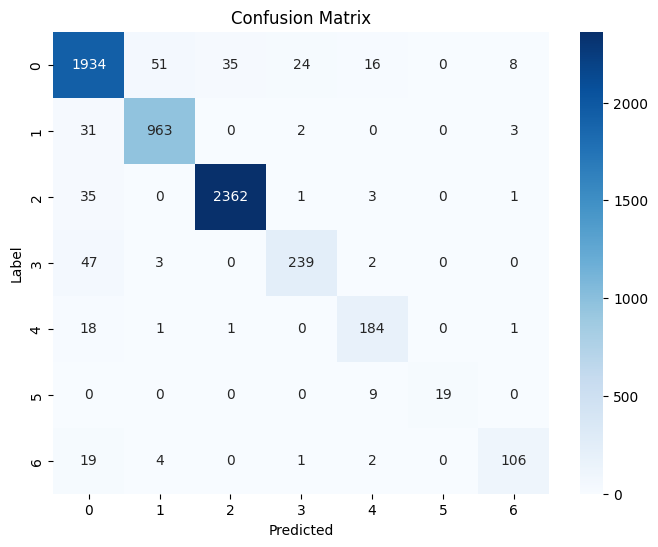

Epoch 2, Train Loss: 0.1356, Train Acc: 95.14%, Val Loss: 0.1303, Val Acc: 95.10%
Epoch 2 Model saved with Validation Accuracy: 95.10%


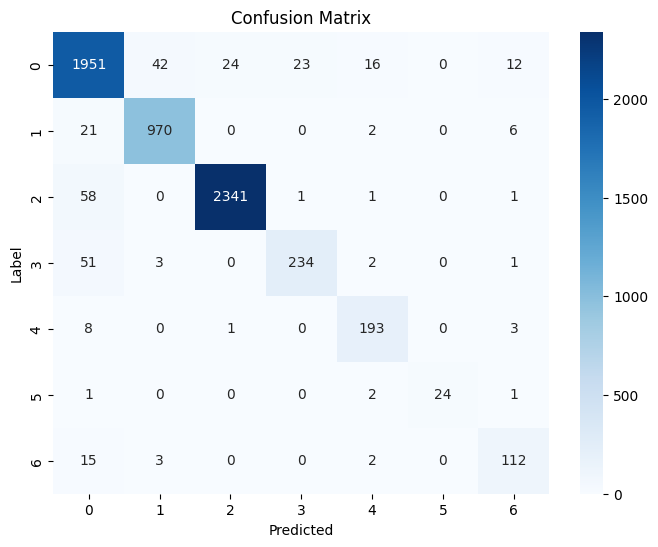

Epoch 3, Train Loss: 0.0843, Train Acc: 97.12%, Val Loss: 0.1531, Val Acc: 94.87%


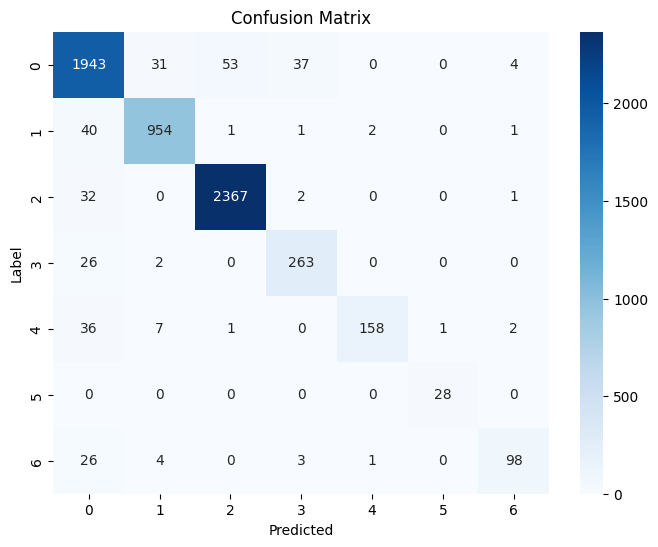

Epoch 4, Train Loss: 0.0601, Train Acc: 97.93%, Val Loss: 0.1504, Val Acc: 95.20%
Epoch 4 Model saved with Validation Accuracy: 95.20%


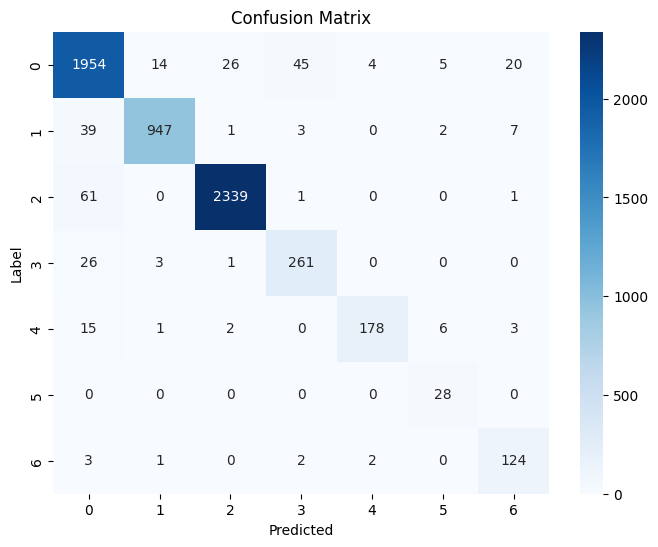

Epoch 5, Train Loss: 0.0470, Train Acc: 98.45%, Val Loss: 0.1440, Val Acc: 95.33%
Epoch 5 Model saved with Validation Accuracy: 95.33%


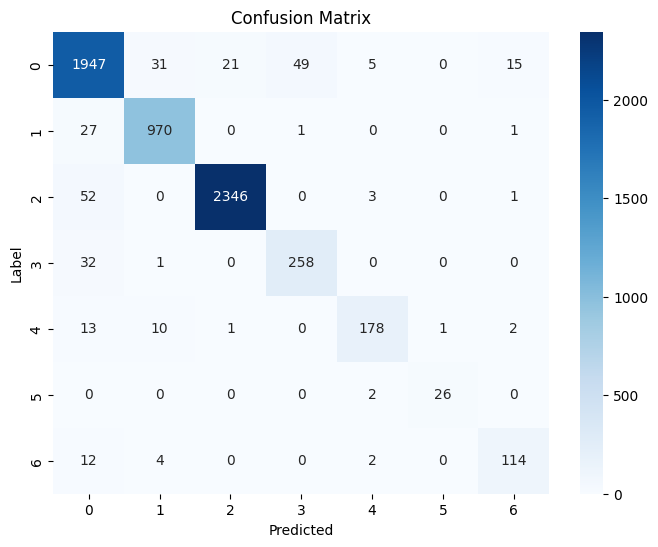

Epoch 6, Train Loss: 0.0400, Train Acc: 98.63%, Val Loss: 0.1447, Val Acc: 95.18%


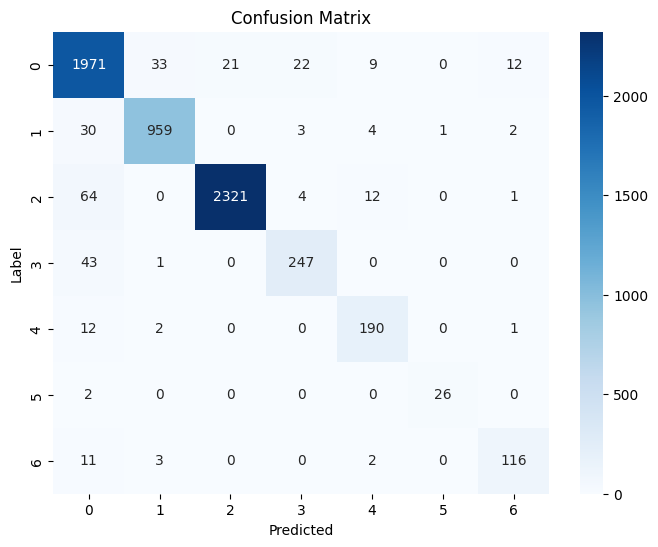

Epoch 7, Train Loss: 0.0340, Train Acc: 98.84%, Val Loss: 0.1697, Val Acc: 95.49%
Epoch 7 Model saved with Validation Accuracy: 95.49%


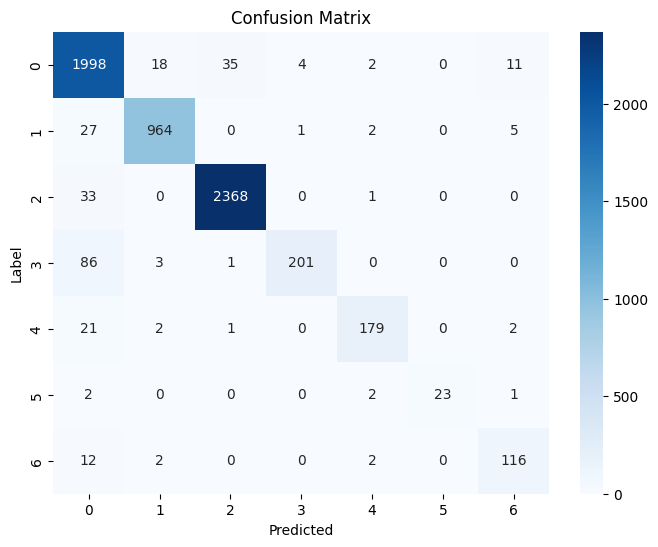

Epoch 8, Train Loss: 0.0213, Train Acc: 99.41%, Val Loss: 0.1643, Val Acc: 95.69%
Epoch 8 Model saved with Validation Accuracy: 95.69%


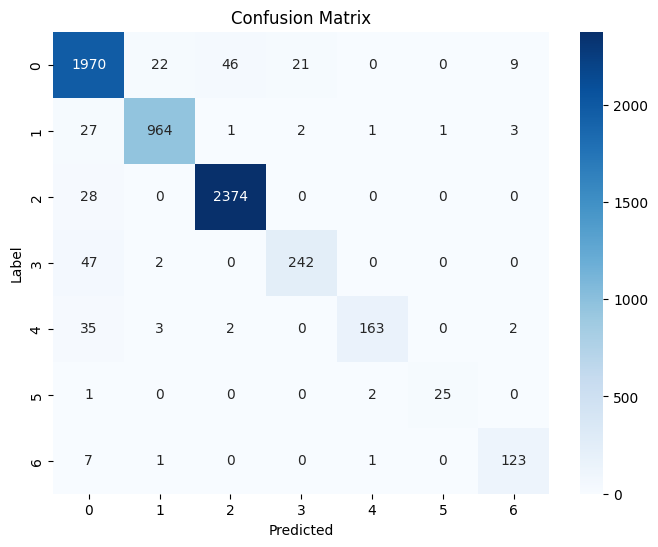

Epoch 9, Train Loss: 0.0330, Train Acc: 98.90%, Val Loss: 0.1774, Val Acc: 95.58%


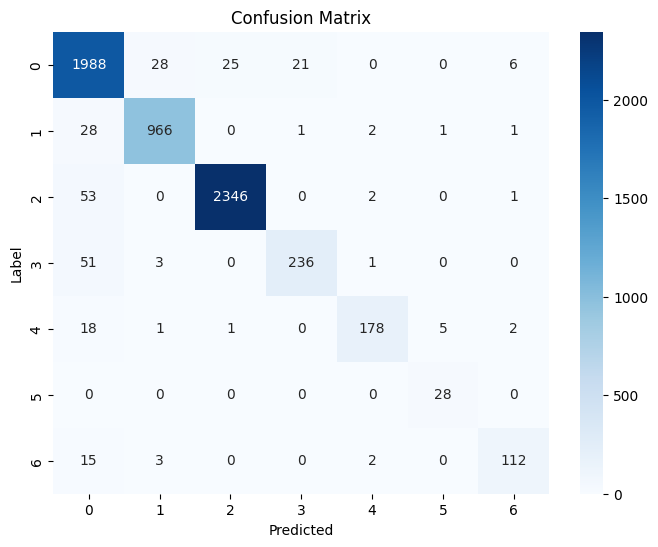

Epoch 10, Train Loss: 0.0239, Train Acc: 99.30%, Val Loss: 0.1515, Val Acc: 95.56%


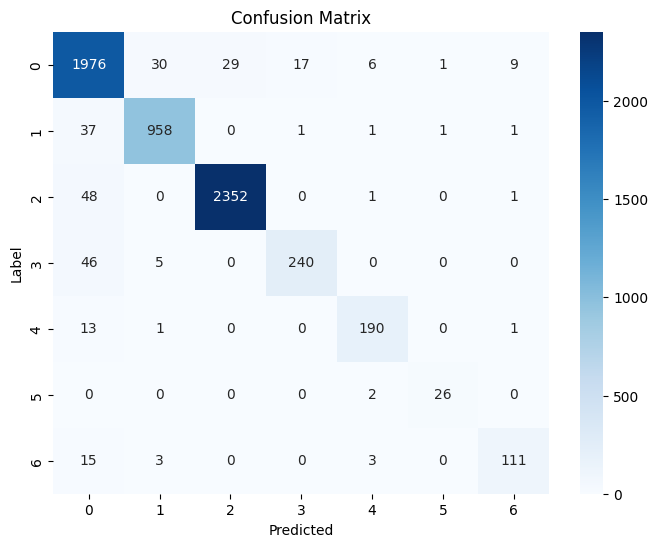

Epoch 11, Train Loss: 0.0210, Train Acc: 99.29%, Val Loss: 0.1829, Val Acc: 95.27%


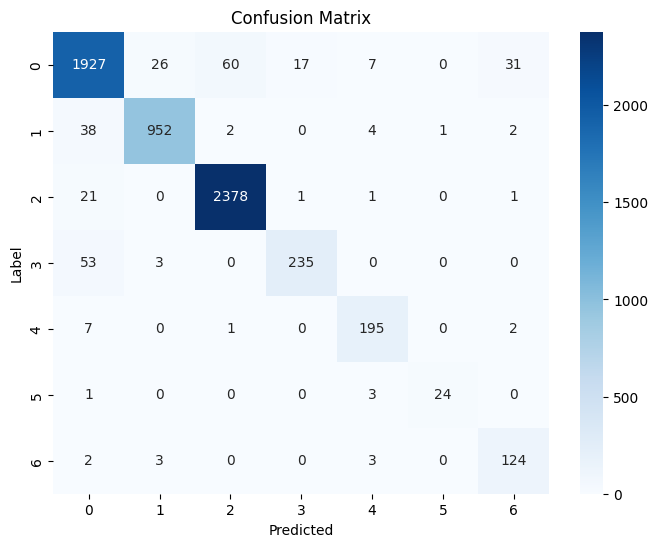

Epoch 12, Train Loss: 0.0199, Train Acc: 99.37%, Val Loss: 0.2475, Val Acc: 93.53%


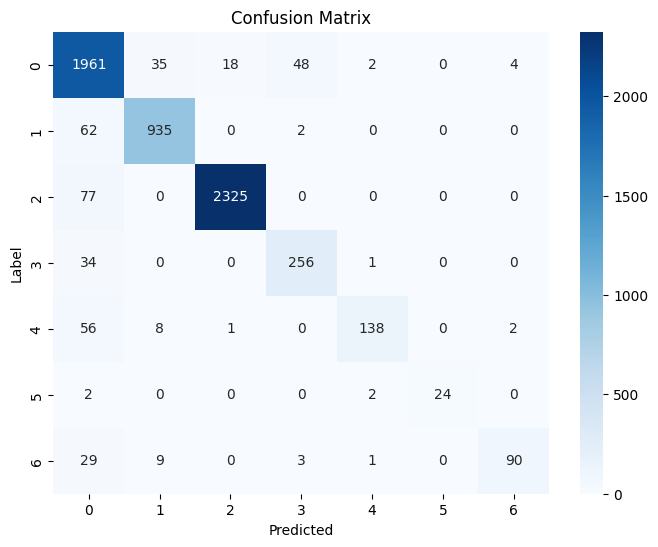

Epoch 13, Train Loss: 0.0188, Train Acc: 99.37%, Val Loss: 0.1604, Val Acc: 96.15%
Epoch 13 Model saved with Validation Accuracy: 96.15%


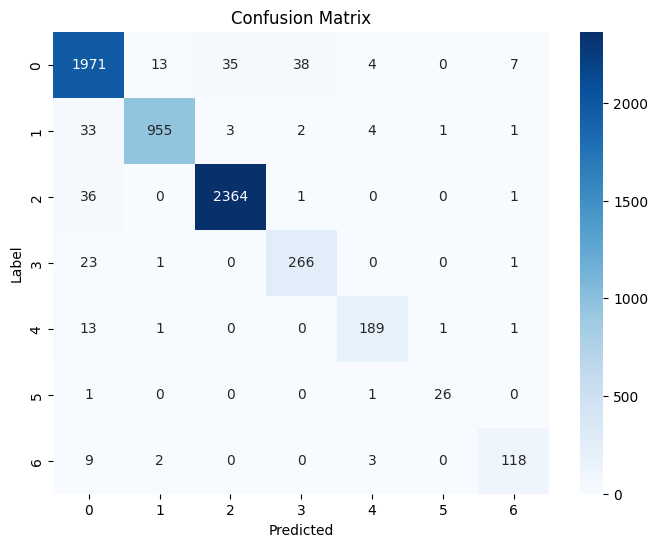

Epoch 14, Train Loss: 0.0147, Train Acc: 99.50%, Val Loss: 0.1664, Val Acc: 95.36%


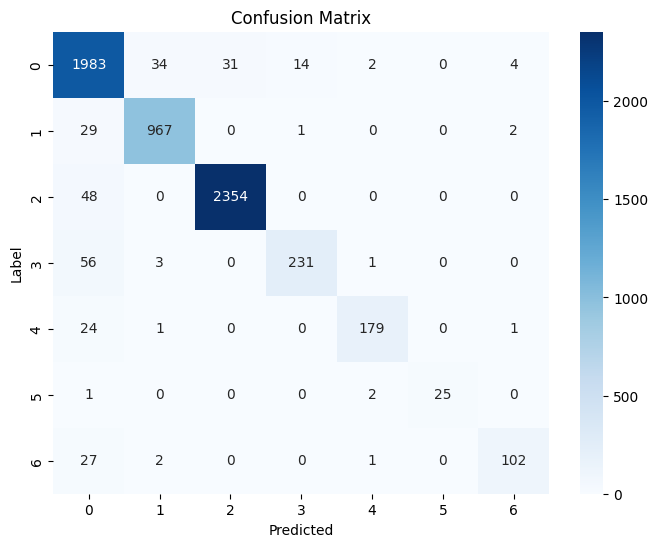

Epoch 15, Train Loss: 0.0134, Train Acc: 99.56%, Val Loss: 0.1855, Val Acc: 95.46%


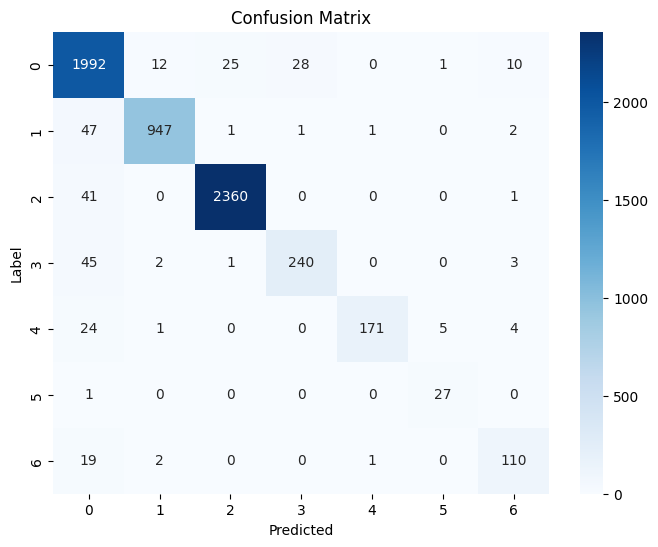

Epoch 16, Train Loss: 0.0159, Train Acc: 99.52%, Val Loss: 0.2045, Val Acc: 94.68%


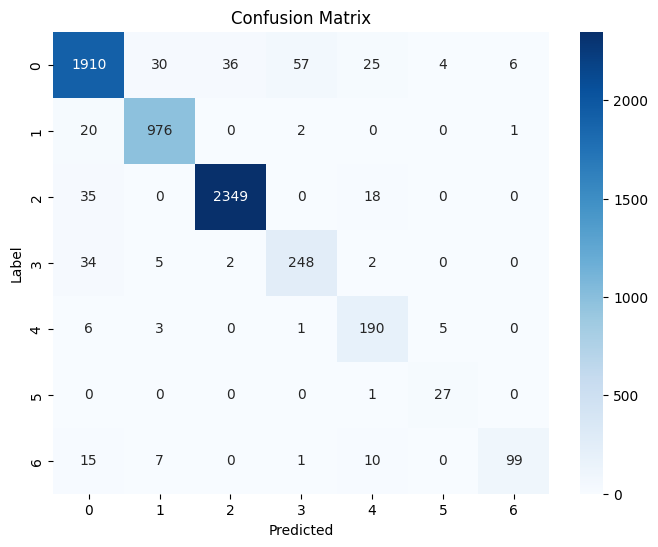

Epoch 17, Train Loss: 0.0183, Train Acc: 99.40%, Val Loss: 0.1613, Val Acc: 96.02%


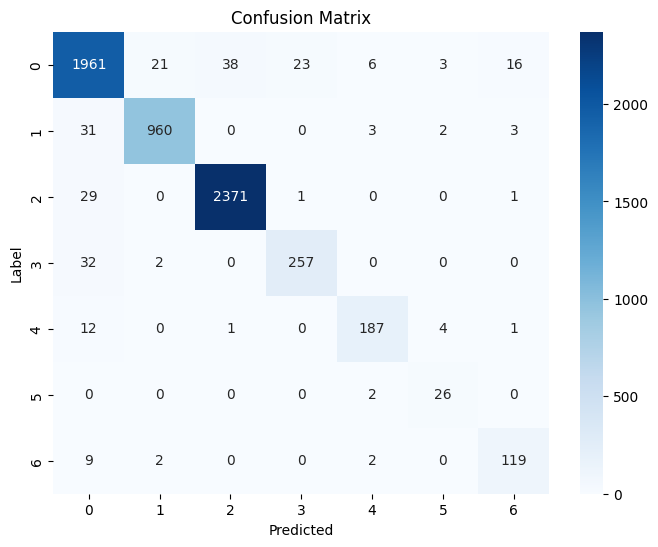

Epoch 18, Train Loss: 0.0065, Train Acc: 99.83%, Val Loss: 0.2051, Val Acc: 95.44%


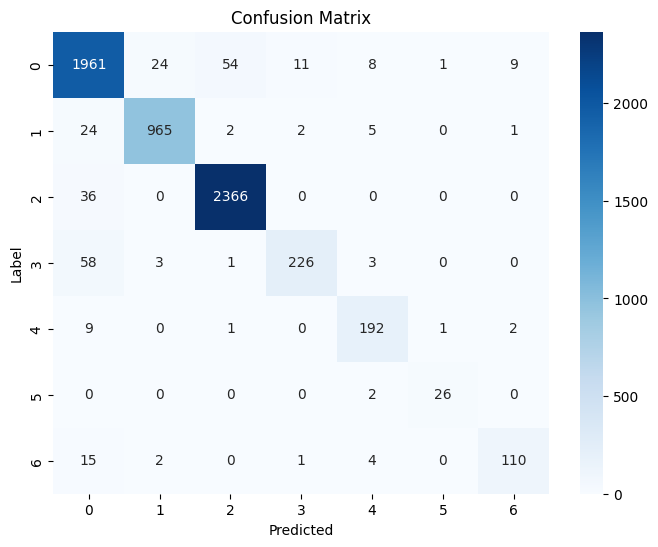

Epoch 19, Train Loss: 0.0186, Train Acc: 99.39%, Val Loss: 0.1820, Val Acc: 95.44%


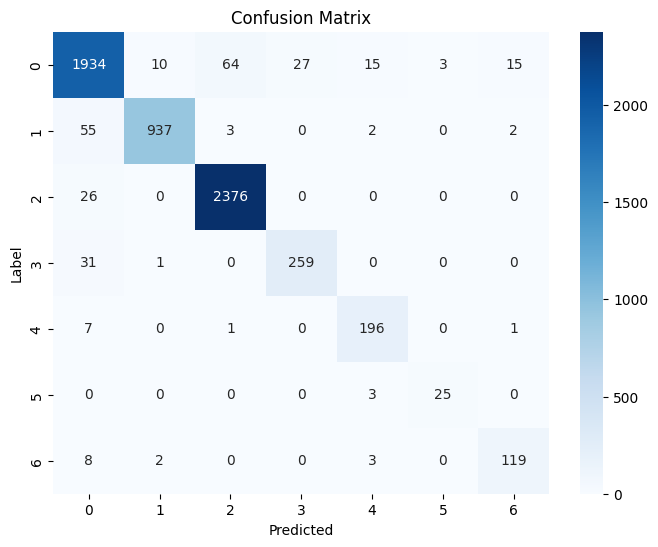

Epoch 20, Train Loss: 0.0061, Train Acc: 99.80%, Val Loss: 0.2109, Val Acc: 95.31%


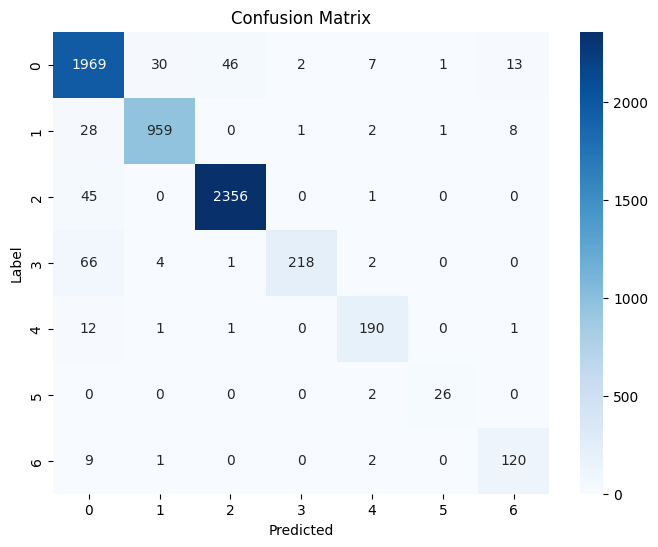

Epoch 1, Train Loss: 0.3988, Train Acc: 86.73%, Val Loss: 0.2712, Val Acc: 90.92%
Epoch 1 Model saved with Validation Accuracy: 90.92%


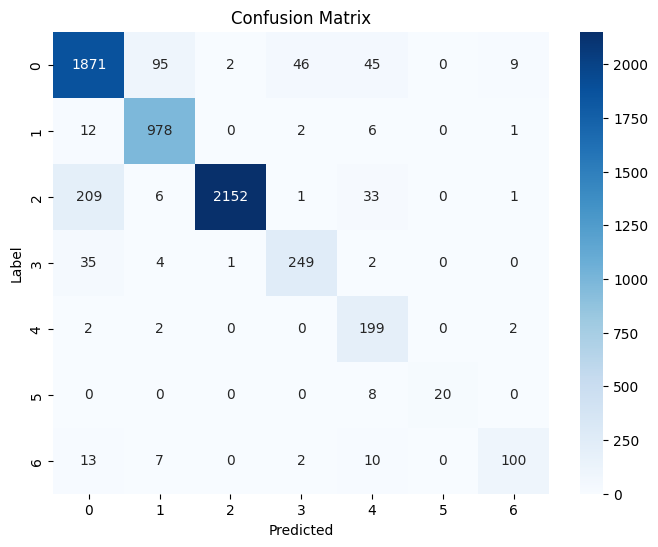

Epoch 2, Train Loss: 0.1463, Train Acc: 94.88%, Val Loss: 0.1244, Val Acc: 95.79%
Epoch 2 Model saved with Validation Accuracy: 95.79%


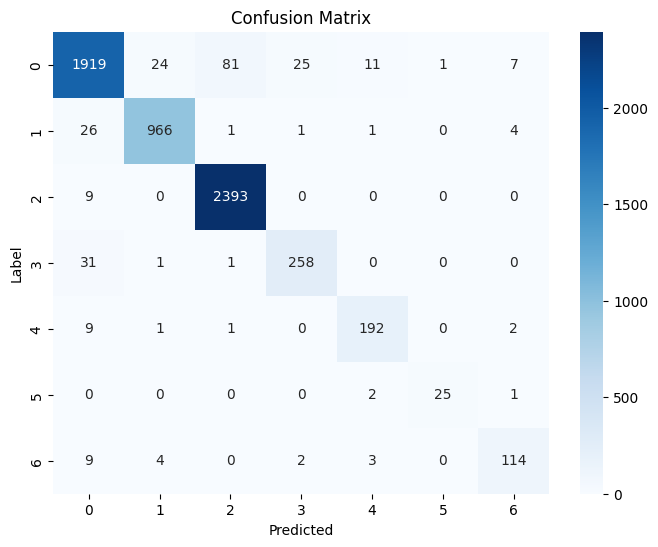

Epoch 3, Train Loss: 0.0976, Train Acc: 96.49%, Val Loss: 0.1364, Val Acc: 94.96%


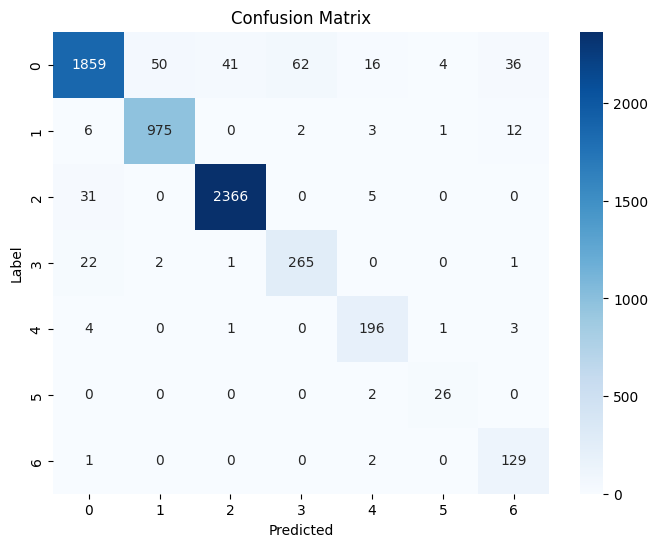

Epoch 4, Train Loss: 0.0744, Train Acc: 97.45%, Val Loss: 0.1198, Val Acc: 95.82%
Epoch 4 Model saved with Validation Accuracy: 95.82%


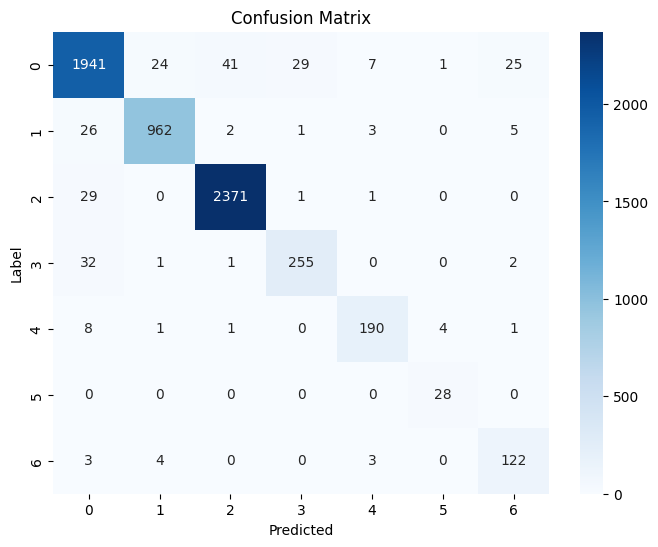

Epoch 5, Train Loss: 0.0541, Train Acc: 98.10%, Val Loss: 0.1236, Val Acc: 95.97%
Epoch 5 Model saved with Validation Accuracy: 95.97%


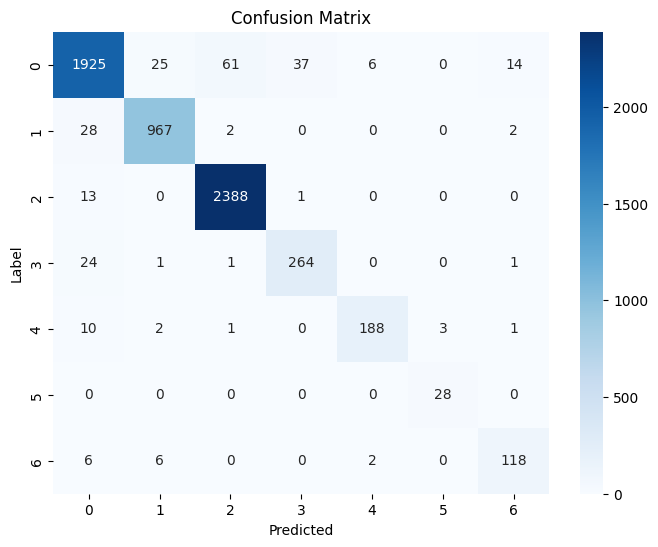

Epoch 6, Train Loss: 0.0444, Train Acc: 98.36%, Val Loss: 0.1207, Val Acc: 96.59%
Epoch 6 Model saved with Validation Accuracy: 96.59%


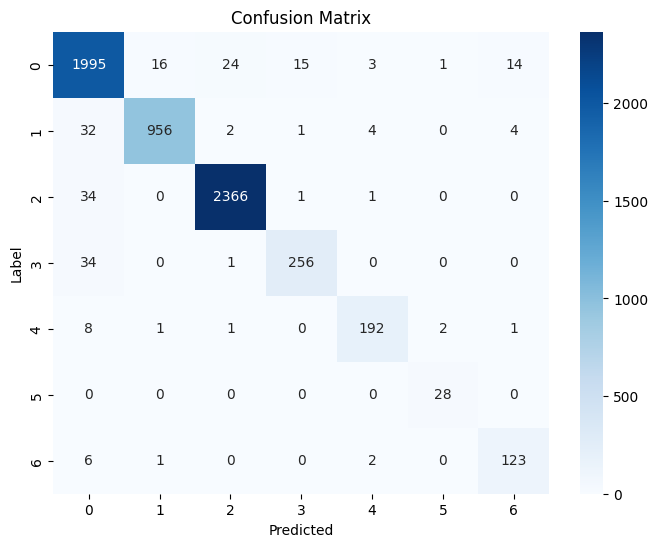

Epoch 7, Train Loss: 0.0348, Train Acc: 98.82%, Val Loss: 0.1483, Val Acc: 95.15%


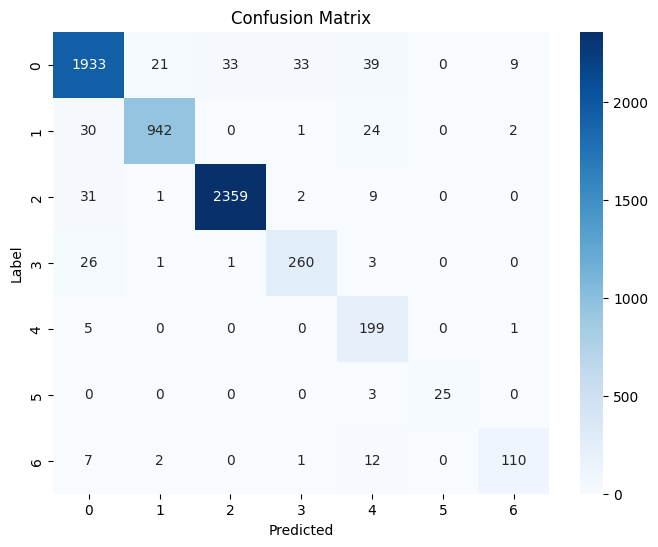

Epoch 8, Train Loss: 0.0264, Train Acc: 99.14%, Val Loss: 0.1383, Val Acc: 95.92%


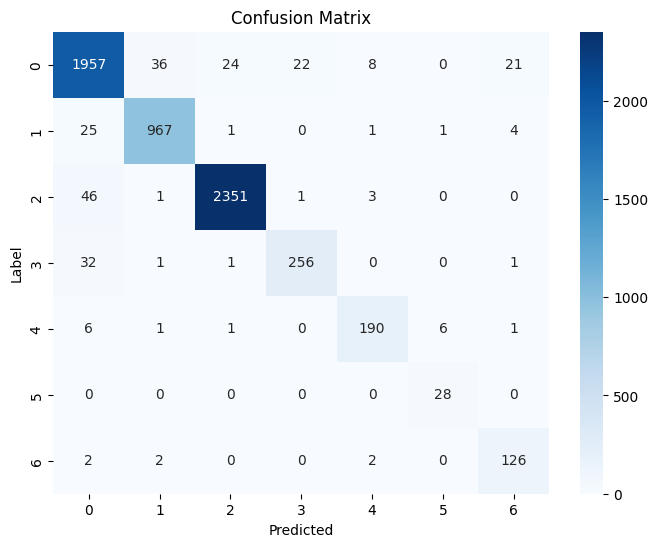

Epoch 9, Train Loss: 0.0276, Train Acc: 99.10%, Val Loss: 0.1398, Val Acc: 96.07%


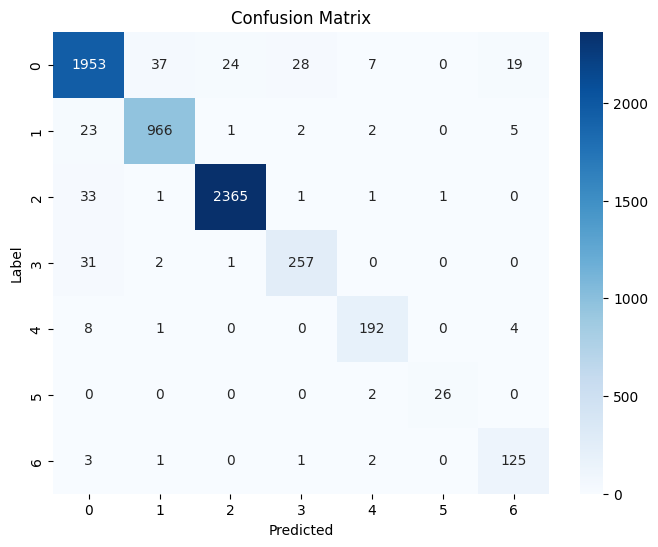

Epoch 10, Train Loss: 0.0286, Train Acc: 99.05%, Val Loss: 0.1507, Val Acc: 95.72%


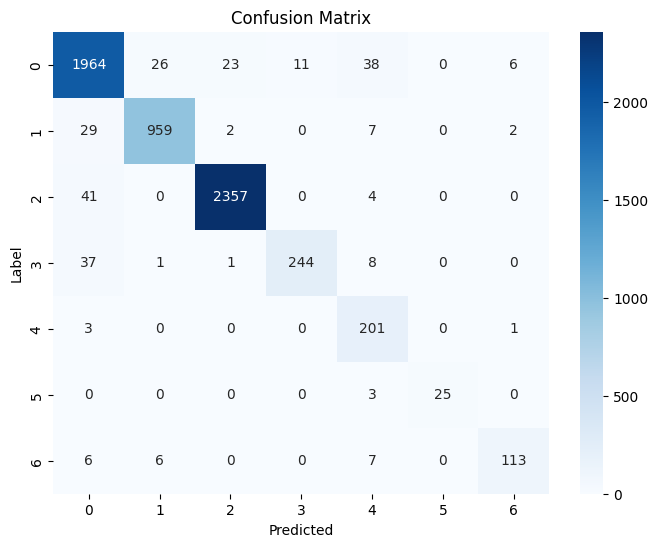

Epoch 11, Train Loss: 0.0184, Train Acc: 99.34%, Val Loss: 0.1723, Val Acc: 95.66%


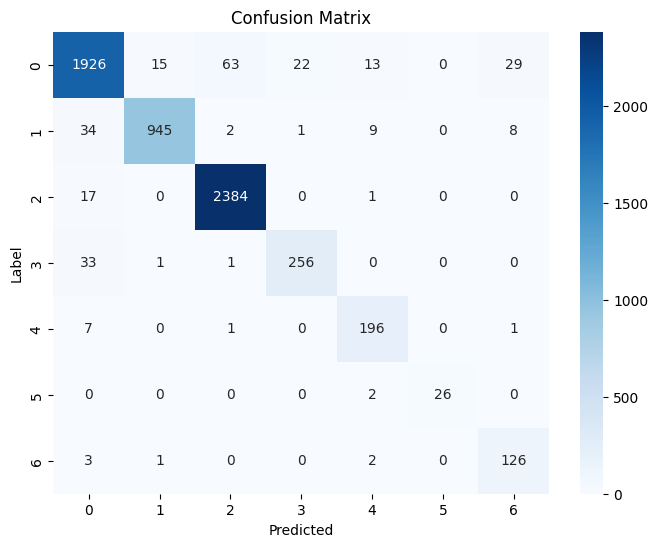

Epoch 12, Train Loss: 0.0194, Train Acc: 99.34%, Val Loss: 0.1555, Val Acc: 96.29%


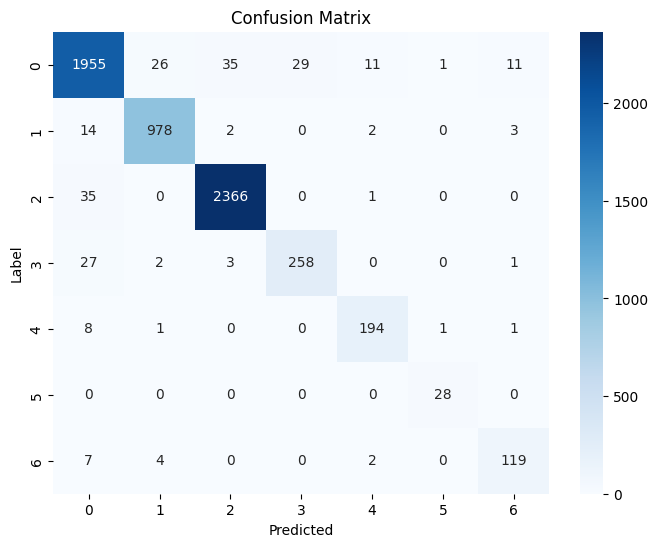

Epoch 13, Train Loss: 0.0265, Train Acc: 99.09%, Val Loss: 0.1753, Val Acc: 96.11%


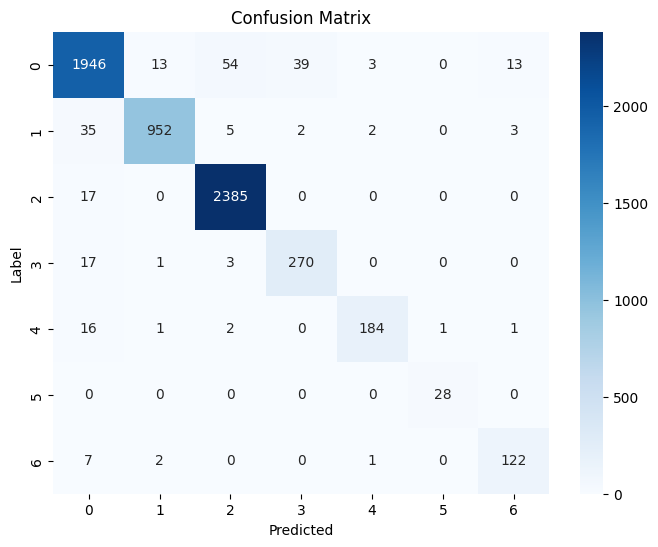

Epoch 14, Train Loss: 0.0187, Train Acc: 99.39%, Val Loss: 0.1474, Val Acc: 96.41%


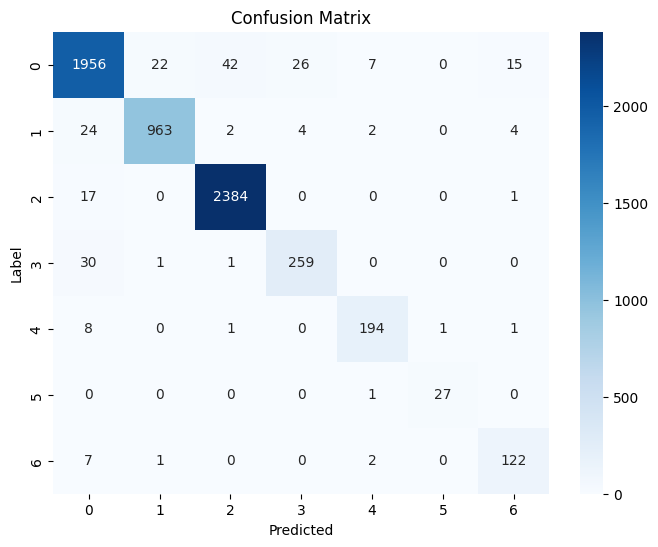

Epoch 15, Train Loss: 0.0114, Train Acc: 99.66%, Val Loss: 0.2002, Val Acc: 96.05%


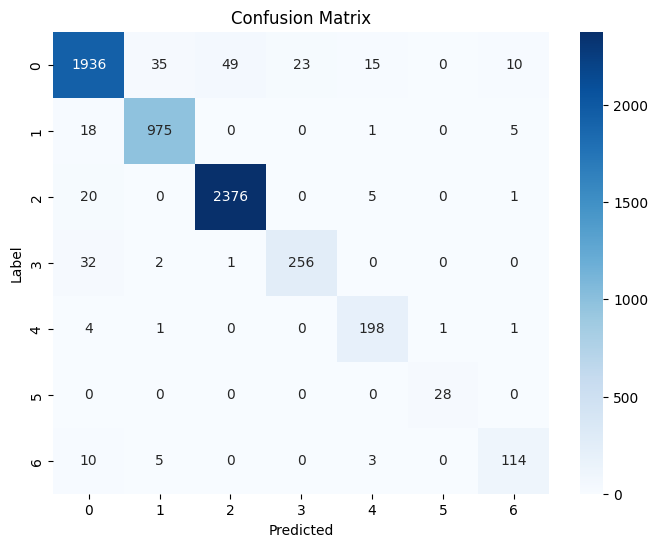

Epoch 16, Train Loss: 0.0166, Train Acc: 99.45%, Val Loss: 0.1866, Val Acc: 96.29%


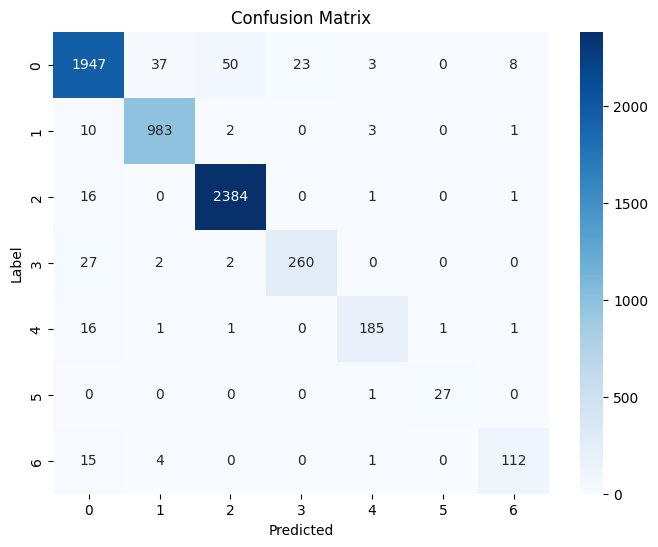

Epoch 17, Train Loss: 0.0190, Train Acc: 99.36%, Val Loss: 0.1965, Val Acc: 96.21%


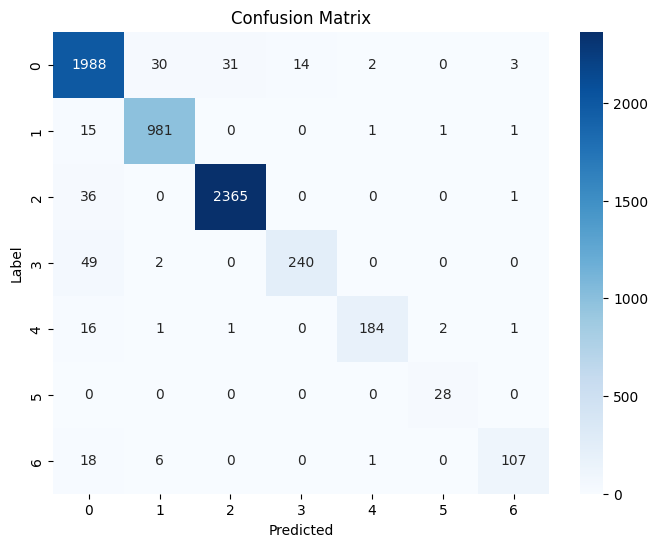

Epoch 18, Train Loss: 0.0116, Train Acc: 99.58%, Val Loss: 0.2003, Val Acc: 95.41%


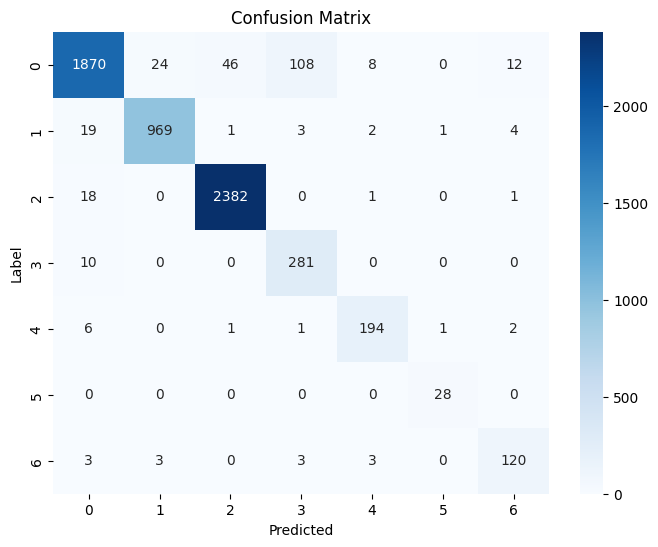

Epoch 19, Train Loss: 0.0101, Train Acc: 99.66%, Val Loss: 0.1799, Val Acc: 96.03%


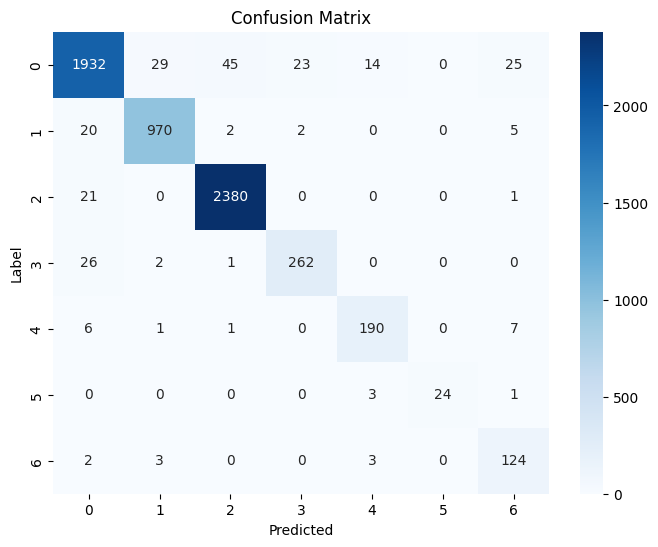

Epoch 20, Train Loss: 0.0118, Train Acc: 99.59%, Val Loss: 0.1993, Val Acc: 95.59%


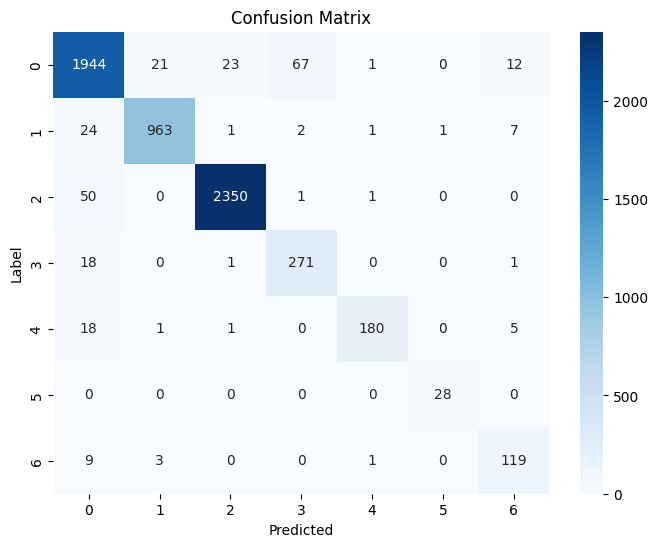

Loaded pretrained weights for efficientnet-b0


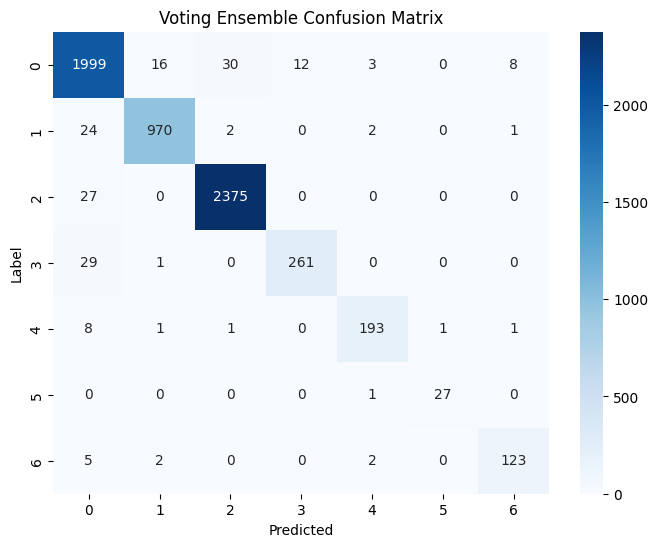

Voting Ensemble Validation Accuracy: 97.11%


97.11020408163266

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tqdm

# 폴더 생성
if not os.path.exists('save_best_model'):
    os.makedirs('save_best_model')

# GPU 사용 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = WaferDataset(df_train, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = WaferDataset(df_val, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델, loss 및 옵티마이저 설정
num_classes = len(class2idx)
densenet_model = DenseNetModel(num_classes).to(device)
resnet_model = ResNetModel(num_classes).to(device)
efficientnet_model = EfficientNetModel(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_densenet = torch.optim.Adam(densenet_model.parameters(), lr=0.0001)
optimizer_resnet = torch.optim.Adam(resnet_model.parameters(), lr=0.0001)
optimizer_efficientnet = torch.optim.Adam(efficientnet_model.parameters(), lr=0.0001)

def validate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    val_loss = running_loss / len(dataloader.dataset)
    val_accuracy = 100 * correct / total
    cm = confusion_matrix(all_targets, all_preds)
    return val_loss, val_accuracy, cm

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    best_val_acc = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        progress_bar = tqdm.tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            progress_bar.set_postfix(loss=loss.item())
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_loss, val_accuracy, cm = validate_model(model, val_loader, criterion)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

        # 최고기록 모델 저장
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), f'save_best_model/{model.__class__.__name__}_best_model.pth')
            print(f"Epoch {epoch+1} Model saved with Validation Accuracy: {val_accuracy:.2f}%")

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Label')
        plt.title('Confusion Matrix')
        plt.show()

# 모델 훈련
train_model(densenet_model, train_loader, val_loader, criterion, optimizer_densenet, num_epochs=20)
train_model(resnet_model, train_loader, val_loader, criterion, optimizer_resnet, num_epochs=20)
train_model(efficientnet_model, train_loader, val_loader, criterion, optimizer_efficientnet, num_epochs=20)

# 최고기록 모델 불러오기
def load_best_model(model_class, model_name, num_classes):
    model = model_class(num_classes)
    model.load_state_dict(torch.load(f'save_best_model/{model_name}_best_model.pth'))
    model.to(device)
    return model

densenet_best_model = load_best_model(DenseNetModel, 'DenseNetModel', num_classes)
resnet_best_model = load_best_model(ResNetModel, 'ResNetModel', num_classes)
efficientnet_best_model = load_best_model(EfficientNetModel, 'EfficientNetModel', num_classes)

# Voting Ensemble
def voting_ensemble_predict(models, dataloader):
    all_outputs = []
    for model in models:
        model.eval()
        outputs = []
        with torch.no_grad():
            for inputs, _ in dataloader:
                inputs = inputs.to(device)
                output = model(inputs)
                outputs.append(output.cpu().numpy())
        all_outputs.append(np.concatenate(outputs, axis=0))

    avg_outputs = np.mean(all_outputs, axis=0)
    ensemble_preds = np.argmax(avg_outputs, axis=1)
    return ensemble_preds

def evaluate_voting_ensemble(models, dataloader):
    all_targets = []
    for _, labels in dataloader:
        all_targets.extend(labels.numpy())

    ensemble_preds = voting_ensemble_predict(models, dataloader)
    cm = confusion_matrix(all_targets, ensemble_preds)
    val_accuracy = 100 * np.sum(ensemble_preds == np.array(all_targets)) / len(all_targets)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Label')
    plt.title('Voting Ensemble Confusion Matrix')
    plt.show()

    print(f'Voting Ensemble Validation Accuracy: {val_accuracy:.2f}%')
    return val_accuracy

models = [densenet_best_model, resnet_best_model, efficientnet_best_model]
evaluate_voting_ensemble(models, val_loader)